In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns



In [4]:

df = pd.read_csv("sample_house_dataset.csv")
df.head()


,age,income,buy_house
0,48,Low,Yes
1,34,Low,Yes
2,27,Low,No
3,40,High,Yes
4,38,High,Yes


In [5]:
df_encoded = df.copy()
df_encoded["income"] = df_encoded["income"].map({"Low":0, "Medium":1, "High":2})
df_encoded["buy_house"] = df_encoded["buy_house"].map({"No":0, "Yes":1})

X = df_encoded[["age", "income"]]
y = df_encoded["buy_house"]


In [6]:

model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X, y)



DecisionTreeClassifier(max_depth=3, random_state=42)

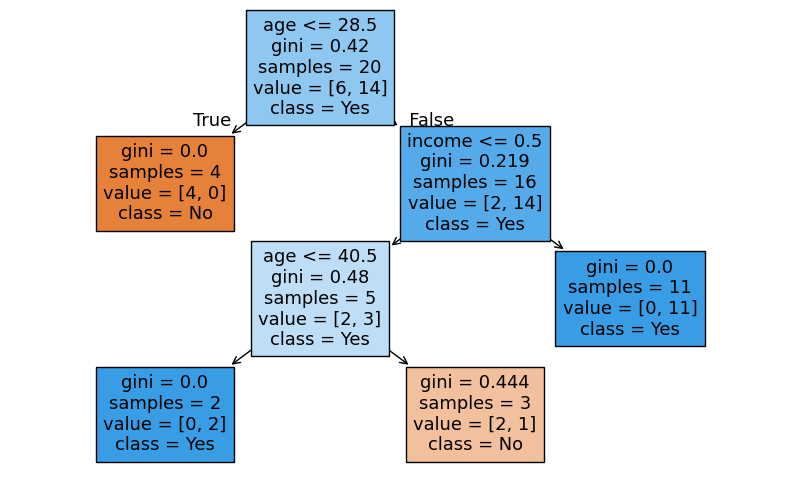

In [7]:

plt.figure(figsize=(10,6))
plot_tree(model, feature_names=["age", "income"], class_names=["No", "Yes"], filled=True)
plt.show()


In [8]:

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred) * 100
print(f"\nAccuracy of Decision Tree: {accuracy:.2f}%")



Accuracy of Decision Tree: 95.00%


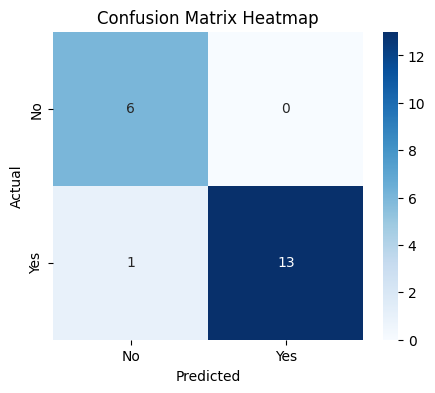

In [9]:

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()